In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn import metrics
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.layers import Dense, Activation, Flatten, Dropout

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

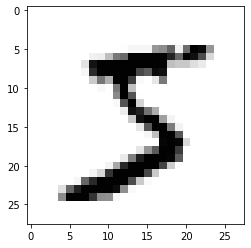

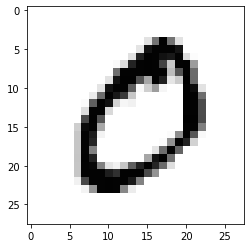

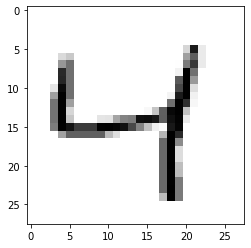

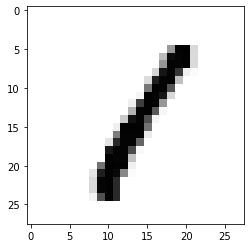

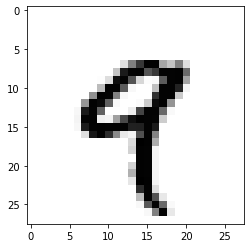

In [4]:
for i in range(5):
    img = X_train[i]
    plt.imshow(img, cmap="Greys")
    plt.show()

In [5]:
X_train = X_train/255
X_test = X_test/255
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train,epochs=20,verbose=2, validation_split=0.3)

Epoch 1/20
1313/1313 - 11s - loss: 0.2808 - accuracy: 0.9173 - val_loss: 0.1547 - val_accuracy: 0.9556 - 11s/epoch - 8ms/step
Epoch 2/20
1313/1313 - 8s - loss: 0.1075 - accuracy: 0.9670 - val_loss: 0.1114 - val_accuracy: 0.9671 - 8s/epoch - 6ms/step
Epoch 3/20
1313/1313 - 8s - loss: 0.0732 - accuracy: 0.9780 - val_loss: 0.1109 - val_accuracy: 0.9668 - 8s/epoch - 6ms/step
Epoch 4/20
1313/1313 - 8s - loss: 0.0553 - accuracy: 0.9824 - val_loss: 0.0969 - val_accuracy: 0.9736 - 8s/epoch - 6ms/step
Epoch 5/20
1313/1313 - 8s - loss: 0.0386 - accuracy: 0.9869 - val_loss: 0.1072 - val_accuracy: 0.9727 - 8s/epoch - 6ms/step
Epoch 6/20
1313/1313 - 8s - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.1465 - val_accuracy: 0.9630 - 8s/epoch - 6ms/step
Epoch 7/20
1313/1313 - 8s - loss: 0.0282 - accuracy: 0.9904 - val_loss: 0.1098 - val_accuracy: 0.9727 - 8s/epoch - 6ms/step
Epoch 8/20
1313/1313 - 8s - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.1056 - val_accuracy: 0.9747 - 8s/epoch - 6ms/step
Epoch 

In [10]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [11]:
y_pred = y_pred.argmax(axis=1)

In [12]:
metrics.accuracy_score(y_test, y_pred)

0.9777

In [13]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=(28,28)))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)               

In [15]:
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
history_2 = model_2.fit(X_train,y_train,epochs=20,verbose=2, validation_split=0.3)

Epoch 1/20
1313/1313 - 12s - loss: 0.4326 - accuracy: 0.8684 - val_loss: 0.1816 - val_accuracy: 0.9454 - 12s/epoch - 9ms/step
Epoch 2/20
1313/1313 - 10s - loss: 0.1972 - accuracy: 0.9431 - val_loss: 0.1282 - val_accuracy: 0.9627 - 10s/epoch - 8ms/step
Epoch 3/20
1313/1313 - 10s - loss: 0.1530 - accuracy: 0.9547 - val_loss: 0.1118 - val_accuracy: 0.9677 - 10s/epoch - 8ms/step
Epoch 4/20
1313/1313 - 10s - loss: 0.1263 - accuracy: 0.9620 - val_loss: 0.1035 - val_accuracy: 0.9713 - 10s/epoch - 8ms/step
Epoch 5/20
1313/1313 - 10s - loss: 0.1167 - accuracy: 0.9653 - val_loss: 0.1035 - val_accuracy: 0.9693 - 10s/epoch - 8ms/step
Epoch 6/20
1313/1313 - 10s - loss: 0.0992 - accuracy: 0.9700 - val_loss: 0.1035 - val_accuracy: 0.9721 - 10s/epoch - 8ms/step
Epoch 7/20
1313/1313 - 10s - loss: 0.0938 - accuracy: 0.9726 - val_loss: 0.1034 - val_accuracy: 0.9719 - 10s/epoch - 8ms/step
Epoch 8/20
1313/1313 - 10s - loss: 0.0872 - accuracy: 0.9739 - val_loss: 0.0953 - val_accuracy: 0.9722 - 10s/epoch - 8

In [17]:
y_pred2 = model_2.predict(X_test)
y_pred2 = y_pred2.argmax(axis=1)
metrics.accuracy_score(y_test, y_pred2)

313/313 [==============================] - 1s 3ms/step


0.9791

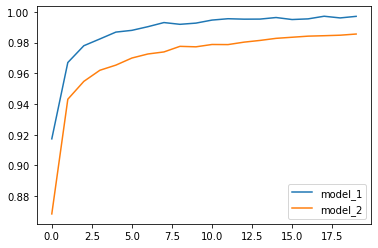

In [18]:
plt.plot(history.history['accuracy'], label = 'model_1')
plt.plot(history_2.history['accuracy'], label = 'model_2')
plt.legend()

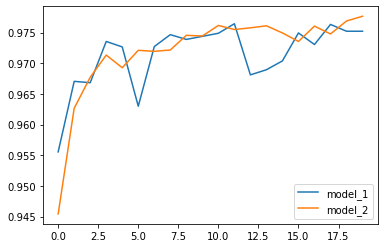

In [19]:
plt.plot(history.history['val_accuracy'], label = 'model_1')
plt.plot(history_2.history['val_accuracy'], label = 'model_2')
plt.legend()

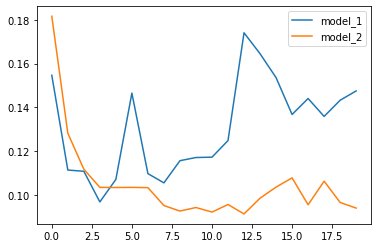

In [20]:
plt.plot(history.history['val_loss'], label = 'model_1')
plt.plot(history_2.history['val_loss'], label = 'model_2')
plt.legend()